In [6]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:

def roll_dice():
    roll = random.randint(1, 100)
    if roll <=50:
        # print(f"{roll} Shit, you lose!")
        return False
    elif roll == 100:
        # print(f"{roll} You Lose, on the house")
        return False
    elif 100>roll>50:
        # print(f"{roll} You Win")
        return True
    

In [4]:
def simple_bettor(funds, initial_wager, wager_count):
    value = funds
    wager = initial_wager
    current_wager = 0

    while current_wager < wager_count:
        if roll_dice():
            value += wager
        else:
            value -= wager
        current_wager += 1
    return value

In [8]:
def double_bettor(funds, initial_wager, wager_count):
    value = funds
    wager = initial_wager
    current_wager = 0
    wX, wY = [], []

    while current_wager < wager_count and value > 0:
        if wager > value:
            break  # bankrupt

        if roll_dice():
            value += wager
            wager = initial_wager  # reset after win
        else:
            value -= wager
            wager *= 2

        wX.append(current_wager)
        wY.append(value)
        current_wager += 1

    plt.plot(wX, wY)
    return value



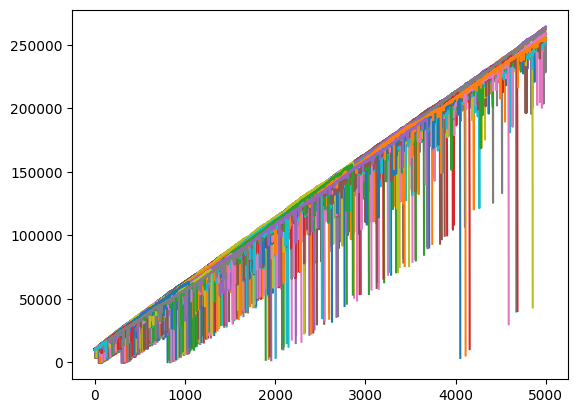

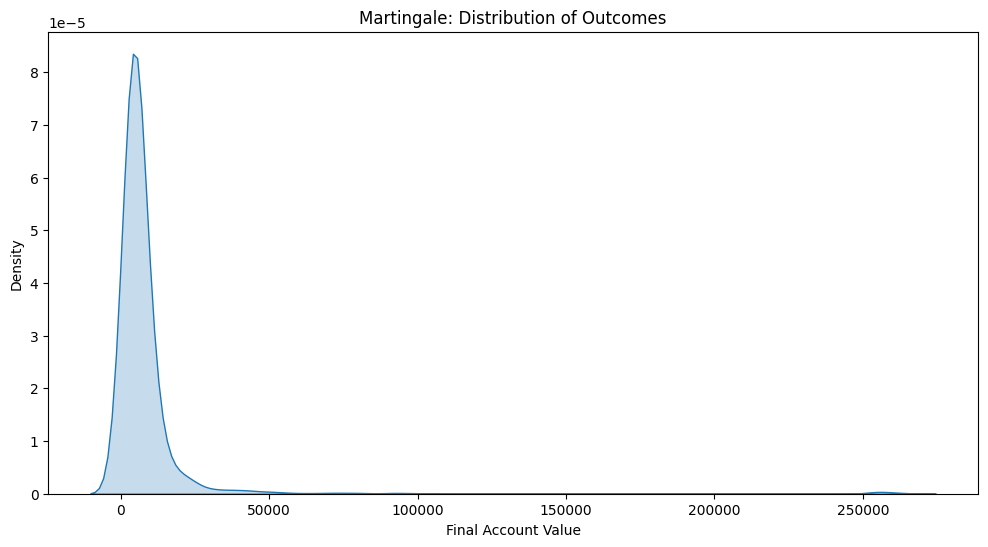

In [9]:
finals = []

for _ in range(5000):
    finals.append(double_bettor(10000, 100, 5000))

plt.figure(figsize=(12, 6))
sns.kdeplot(finals, fill=True)
plt.xlabel("Final Account Value")
plt.title("Martingale: Distribution of Outcomes")
plt.show()


In [10]:
import numpy as np

finals = np.array(finals)
initial_funds = 10000
ruin_threshold = 5000

prob_ruin = np.mean(finals < ruin_threshold)
prob_profit = np.mean(finals > initial_funds)

prob_ruin, prob_profit


(np.float64(0.4794), np.float64(0.1574))

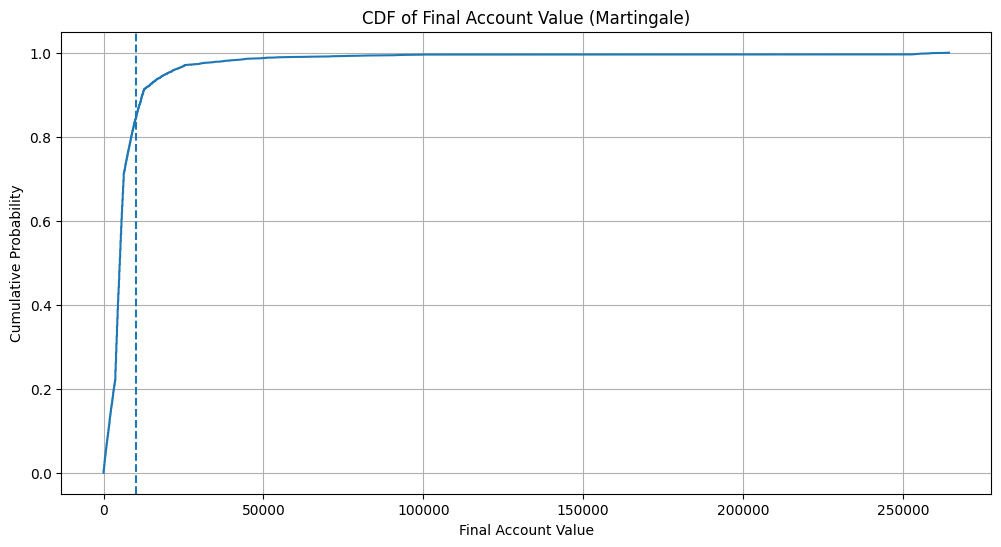

In [11]:
sorted_finals = np.sort(finals)
cdf = np.arange(1, len(sorted_finals) + 1) / len(sorted_finals)

plt.figure(figsize=(12, 6))
plt.plot(sorted_finals, cdf)
plt.axvline(initial_funds, linestyle="--")
plt.xlabel("Final Account Value")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Final Account Value (Martingale)")
plt.grid(True)
plt.show()

In [12]:
log_growth = np.log(finals / initial_funds)
np.mean(log_growth), np.median(log_growth)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23792\2787096346.py:1: RuntimeWarning: divide by zero encountered in log
  log_growth = np.log(finals / initial_funds)


(np.float64(-inf), np.float64(-0.6733445532637656))

In [13]:
p = 0.49
q = 1 - p
b = 1

kelly_f = (p * (b + 1) - 1) / b
kelly_f


-0.020000000000000018